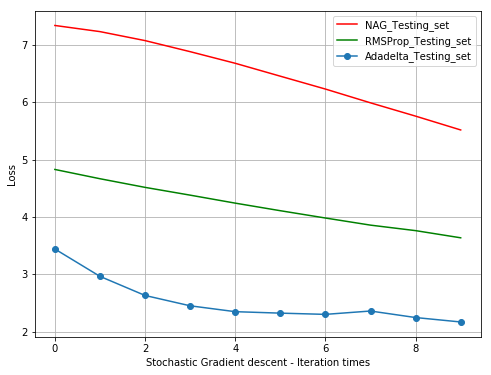

In [23]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split 
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import math

def get_data():
    data = load_svmlight_file("F:\\BaiduNetdiskDownload\\machinelearning\\a9a.txt")
    return data[0], data[1]

def get_data_t():
    data = load_svmlight_file("F:\\BaiduNetdiskDownload\\machinelearning\\a9a.t")
    return data[0], data[1]

def function(x,w,b):
    z = 0 
    x = np.ndarray.tolist(x)

    for i in range(len(x)):
        z += x[0][i] * w[i] 
    z += b
    return z

x_train,y_train=get_data()
x_test,y_test=get_data_t()
b = np.random.rand() #random
w = np.random.rand(123)
x_train = x_train.todense()
x_test = x_test.todense()
x_train_len=len(x_train)
x_test_len=len(x_test)

####################################NAG
count = 10
lr=0.1
feature=123
r = 0.9
v=np.random.rand(123)*0
train_new_loss = []
test_new_loss = []
w2 = math.sqrt(sum((w[i])**2 for i in range(feature)))
loss = r*w2 + (sum(max(0,1-y_train[i]*function(x_train[i],w,b)) for i in range(x_train_len)))/x_train_len

for k in range(count):

    i = random.randint(x_train_len)
    for j in range(feature):
        g = w[j]+r*v[j]+(-y_train[i])*(function(x_train[i],w,b)*y_train[i]<1)*x_train[i,j]
        
        
        v[j] = r*v[j]-lr*g 
        w[j] += v[j] * lr 

    w2 = math.sqrt(sum((w[i])**2 for i in range(feature)))
    train_loss = r*w2 + (sum(max(0,1-y_train[i]*function(x_train[i],w,b)) for i in range(x_train_len)))/x_train_len
    test_loss = r*w2 + (sum(max(0,1-y_test[i]*function(x_test[i],w,b)) for i in range(x_test_len)))/x_test_len

    train_new_loss.append(train_loss)
    test_new_loss.append(test_loss)
    
########################################RMSProp
count = 10
lr=0.02
h=0.5
r = 0.8
feature=123
G = zeros([123,1])
v=np.random.rand(123)*0
train_new_loss2 = []
test_new_loss2 = []
w2 = math.sqrt(sum((w[i])**2 for i in range(feature)))
loss = r*w2 + (sum(max(0,1-y_train[i]*function(x_train[i],w,b)) for i in range(x_train_len)))/x_train_len

for k in range(count):

    i = random.randint(x_train_len)
    for j in range(feature):
        g = w[j]+(-y_train[i])*(function(x_train[i],w,b)*y_train[i]<1)*x_train[i,j]
        
        G[j]= h*G[j]+(1-h)*(g**2)
        if G[j]<0:
            print("!!!")
        w[j] -= lr/math.sqrt(G[j]+0.0000000001)*g 

    w2 = math.sqrt(sum((w[i])**2 for i in range(feature)))
    train_loss2 = r*w2 + (sum(max(0,1-y_train[i]*function(x_train[i],w,b)) for i in range(x_train_len)))/x_train_len
    test_loss2 = r*w2 + (sum(max(0,1-y_test[i]*function(x_test[i],w,b)) for i in range(x_test_len)))/x_test_len

    train_new_loss2.append(train_loss2)
    test_new_loss2.append(test_loss2)

########################################Adadelta
count = 10
lr=0.05
h=0.8
r = 0.9
feature=123
G = zeros([123,1])
v=np.random.rand(123)*0
train_new_loss3 = []
test_new_loss3 = []
w2 = math.sqrt(sum((w[i])**2 for i in range(feature)))
loss = r*w2 + (sum(max(0,1-y_train[i]*function(x_train[i],w,b)) for i in range(x_train_len)))/x_train_len

for k in range(count):

    i = random.randint(x_train_len)
    for j in range(feature):
        g = w[j]+(-y_train[i])*(function(x_train[i],w,b)*y_train[i]<1)*x_train[i,j]
        
        G[j]= h*G[j]+(1-h)*(g**2)
        if G[j]<0:
            print("!!!")
        w[j] -= lr/math.sqrt(G[j]+0.0000000001)*g 

    w2 = math.sqrt(sum((w[i])**2 for i in range(feature)))
    train_loss3 = r*w2 + (sum(max(0,1-y_train[i]*function(x_train[i],w,b)) for i in range(x_train_len)))/x_train_len
    test_loss3 = r*w2 + (sum(max(0,1-y_test[i]*function(x_test[i],w,b)) for i in range(x_test_len)))/x_test_len

    train_new_loss3.append(train_loss3)
    test_new_loss3.append(test_loss3)

plt.figure(figsize=(8,6))
plt.xlabel('Stochastic Gradient descent - Iteration times')
plt.ylabel('Loss')
plt.plot(range(count), test_new_loss, 'r-', label=u"NAG_Testing_set")
plt.plot(range(count), test_new_loss2, 'g-', label=u"RMSProp_Testing_set")
plt.plot(range(count), test_new_loss3, 'o-', label=u"Adadelta_Testing_set")
plt.legend()
plt.grid()
plt.show()


